In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv(r"C:\Users\Praval Patel\Downloads\BostonHousing.csv")

##  EDA

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
df.shape

(506, 14)

In [11]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [12]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [13]:
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis      rad  tax  ptratio  b       lstat  medv
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900   1    296  15.3     396.90  4.98   24.0    1
1.13081   0.0   8.14   0     0.538  5.713  94.1   4.2330   4    307  21.0     360.17  22.60  12.7    1
1.46336   0.0   19.58  0     0.605  7.489  90.8   1.9709   5    403  14.7     374.43  1.73   50.0    1
1.42502   0.0   19.58  0     0.871  6.510  100.0  1.7659   5    403  14.7     364.31  7.39   23.3    1
1.41385   0.0   19.58  1     0.871  6.129  96.0   1.7494   5    403  14.7     321.02  15.12  17.0    1
                                                                                                    ..
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889   1    273  21.0     393.45  6.48   22.0    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384  20.9     393.49  13.00  21.7    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.5857  4    334  22.0     

In [14]:
df.dropna(how='any', inplace = True)
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## coverting float to int

In [15]:
df['crim'] = df['crim'].astype(int)
df['zn'] = df['zn'].astype(int)
df['indus'] = df['indus'].astype(int)
df['chas'] = df['chas'].astype(int)
df['nox'] = df['nox'].astype(int)
df['rm'] = df['rm'].astype(int)
df['age'] = df['age'].astype(int)
df['dis'] = df['dis'].astype(int)
df['ptratio']= df['ptratio'].astype(int)
df['b']= df['b'].astype(int)
df['lstat']= df['lstat'].astype(int)
df['medv']= df['medv'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   crim     501 non-null    int32
 1   zn       501 non-null    int32
 2   indus    501 non-null    int32
 3   chas     501 non-null    int32
 4   nox      501 non-null    int32
 5   rm       501 non-null    int32
 6   age      501 non-null    int32
 7   dis      501 non-null    int32
 8   rad      501 non-null    int64
 9   tax      501 non-null    int64
 10  ptratio  501 non-null    int32
 11  b        501 non-null    int32
 12  lstat    501 non-null    int32
 13  medv     501 non-null    int32
dtypes: int32(12), int64(2)
memory usage: 35.2 KB


## Rename columns

In [17]:
df.rename(columns = {'crim':'Crime'},inplace=True)
df.rename(columns = {'rm':'Rating'},inplace=True)
df.rename(columns = {'age':'Age'},inplace=True)
df.rename(columns = {'rm':'Rating'},inplace=True)
df.rename(columns = {'tax':'Tax'},inplace=True)

In [18]:
df.head(5)

,Crime,zn,indus,chas,nox,Rating,Age,dis,rad,Tax,ptratio,b,lstat,medv
0,0,18,2,0,0,6,65,4,1,296,15,396,4,24
1,0,0,7,0,0,6,78,4,2,242,17,396,9,21
2,0,0,7,0,0,7,61,4,2,242,17,392,4,34
3,0,0,2,0,0,6,45,6,3,222,18,394,2,33
4,0,0,2,0,0,7,54,6,3,222,18,396,5,36


## dividing two parts for prediction

In [19]:
x = df.drop([ 'Tax'],axis=1)
y = df["Tax"]

In [20]:
x

,Crime,zn,indus,chas,nox,Rating,Age,dis,rad,ptratio,b,lstat,medv
0,0,18,2,0,0,6,65,4,1,15,396,4,24
1,0,0,7,0,0,6,78,4,2,17,396,9,21
2,0,0,7,0,0,7,61,4,2,17,392,4,34
3,0,0,2,0,0,6,45,6,3,18,394,2,33
4,0,0,2,0,0,7,54,6,3,18,396,5,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,11,0,0,6,69,2,1,21,391,9,22
502,0,0,11,0,0,6,76,2,1,21,396,9,20
503,0,0,11,0,0,6,91,2,1,21,396,5,23
504,0,0,11,0,0,6,89,2,1,21,393,6,22


In [21]:
y

0      296
1      242
2      242
3      222
4      222
      ... 
501    273
502    273
503    273
504    273
505    273
Name: Tax, Length: 501, dtype: int64

## Tranning and Test data 

In [22]:
# splitting Tranning and Test data
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=2)

In [23]:
x_train

,Crime,zn,indus,chas,nox,Rating,Age,dis,rad,ptratio,b,lstat,medv
496,0,0,9,0,0,5,72,2,6,19,396,21,19
55,0,90,1,0,0,7,21,8,5,17,395,4,35
341,0,35,1,0,0,7,49,7,1,15,394,5,32
159,1,0,19,0,0,6,100,1,5,14,364,7,23
398,38,0,18,0,0,5,100,1,24,20,396,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,8,0,0,5,100,4,4,21,394,19,14
75,0,0,12,0,0,6,45,4,5,18,383,8,21
498,0,0,9,0,0,6,65,2,6,19,396,12,21
16,1,0,8,0,0,5,29,4,4,21,386,6,23


In [24]:
x_test

,Crime,zn,indus,chas,nox,Rating,Age,dis,rad,ptratio,b,lstat,medv
133,0,0,21,0,0,5,95,2,4,21,388,15,18
285,0,55,2,0,0,6,31,7,1,15,394,8,22
412,18,0,18,0,0,4,100,1,24,20,28,34,17
389,8,0,18,0,0,5,98,1,24,20,396,20,11
230,0,0,6,0,0,5,68,3,8,17,378,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0,25,0,0,6,84,2,2,19,377,14,20
474,8,0,18,0,0,5,95,2,24,20,352,18,13
400,25,0,18,0,0,5,100,1,24,20,396,26,5
151,1,0,19,0,0,5,100,1,5,14,341,13,19


In [25]:
y_train

496    391
55     226
341    284
159    403
398    666
      ... 
23     307
75     398
498    391
16     307
173    296
Name: Tax, Length: 400, dtype: int64

In [26]:
y_test

133    437
285    300
412    666
389    666
230    307
      ... 
121    188
474    666
400    666
151    403
434    666
Name: Tax, Length: 101, dtype: int64

In [27]:
# Linner Reggresion Model
zx = LinearRegression()

## Fit Logistic Regreession model

In [28]:
zx.fit(x_train,y_train)

LinearRegression()

In [32]:
test_data_prediction = zx.predict(x_test)

In [33]:
# test data score
error_score = metrics.r2_score(y_test,test_data_prediction )
print("R squred error :", error_score)

R squred error : 0.906091434162532


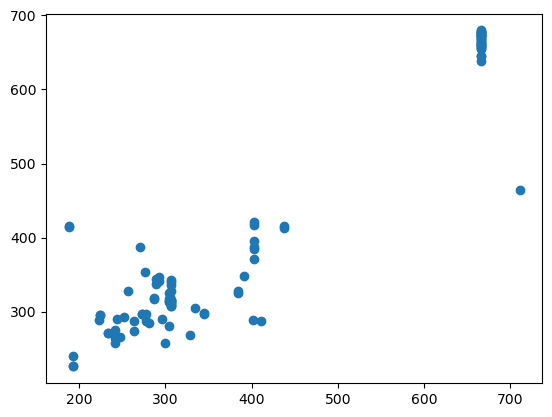

In [34]:
# Testing data prediction
plt.scatter(y_test, test_data_prediction)
plt.show()

In [41]:
print(zx.predict([[0,0,7,0,0,6,78,4,2,17,396,9,21]]))

[275.9138628]


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
print(zx.predict([[0,0,7,0,0,7,61,4,2,17,392,4,34]]))

[257.85492806]


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
print(zx.predict([[0,0,2,0,0,7,54,6,3,18,396,5,36]]))

[222.87826036]


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
print(zx.predict([[1,0,8,0,0,5,98,3,4,21,376,21,13]]))

[313.2771997]


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
